In [15]:
import pandas as pd
import glob
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
curated_path = "../data/curated/property_all/*.csv"
file_lst2 = []
for fname in glob.glob(curated_path):
    file_lst2.append(fname)
file_lst2
# combine all files in the list
df = pd.concat([pd.read_csv(f) for f in file_lst2 ])

In [22]:
df

,Unnamed: 0,address,latitude,longitude,nbed,nbath,ncar,price,type,historical_dates,postcode,year,month,suburb,weekly_rent
0,0,"231 MAIN ROAD, CHEWTON",-37.080966,144.265555,2.0,1.0,3,$380_per_week,House,March 2022,3451,2022,3,CHEWTON,380
1,1,"231 MAIN ROAD, CHEWTON",-37.080966,144.265555,2.0,1.0,3,$380_per_week,House,February 2022,3451,2022,2,CHEWTON,380
2,2,"231 MAIN ROAD, CHEWTON",-37.080966,144.265555,2.0,1.0,3,$380,House,February 2022,3451,2022,2,CHEWTON,380
3,209,"27 BARKLY STREET, CHILTERN",-36.15488,146.605010,3.0,1.0,2,$400_per_week,Rental_residential,September 2022,3683,2022,9,CHILTERN,400
4,210,"17 PARK STREET, CHILTERN",-36.148025,146.608721,3.0,2.0,0,$350_per_week,Rental_residential,August 2022,3683,2022,8,CHILTERN,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37891,4575,"1390 MICKLEHAM ROAD, YUROKE",-37.598484,144.881828,4.0,1.0,4,$500_p.w.,House,April 2019,3063,2019,4,YUROKE,500
37892,4576,"1390 MICKLEHAM ROAD, YUROKE",-37.598484,144.881828,4.0,1.0,4,$500,House,April 2019,3063,2019,4,YUROKE,500
37893,4577,"1390 MICKLEHAM ROAD, YUROKE",-37.598484,144.881828,4.0,1.0,4,$500_pw,House,April 2019,3063,2019,4,YUROKE,500
37894,4578,"1390 MICKLEHAM ROAD, YUROKE",-37.598484,144.881828,4.0,1.0,4,$500_Weekly,House,April 2019,3063,2019,4,YUROKE,500


In [8]:

type_df = df[['type', 'year','weekly_rent','postcode']]\
        .groupby(['type'],as_index = False) \
        .agg(
            {\
                'weekly_rent': 'mean', # count number of instances from sample
                'postcode': 'count'
            }
        ) \
        .rename({'postcode': 'num','weekly_rent': 'averaged_wk_rent' }, axis=1)

type_df

,type,averaged_wk_rent,num
0,- House,240.000000,1
1,2 Storey Unit,455.000000,1
2,Acreage,389.016393,61
3,Acreage Semi Rural,333.888889,9
4,Acreage Semi-rural,380.769231,13
...,...,...,...
69,Vacantland,355.000000,4
70,Villa,452.733884,605
71,"Villa, House",365.000000,1
72,"Villa, Unit, House",460.000000,1


In [12]:
list(type_df.type)

['- House',
 '2 Storey Unit',
 'Acreage',
 'Acreage Semi Rural',
 'Acreage Semi-rural',
 'Acreage/semi Rural',
 'Acreage/semi-rural',
 'Acreagesemi-rural',
 'Alpine',
 'Apartment',
 'Available',
 'Available Date',
 'Available Now',
 'Block Of Units',
 'Block Units',
 'Building',
 'Commercial',
 'Cottage',
 'Development',
 'Duplex',
 'Duplex Or Semi',
 'Duplex/semi Detach',
 'Duplexsemi',
 'Duplexsemi-detached',
 'Farm',
 'Flat',
 'Flat, Block Of Units',
 'Holiday',
 'Holiday, Rural',
 'Home Unit',
 'Hotel/leisure',
 'House',
 'House-on-acreage',
 'Houseland',
 'Houses',
 'Industrial/warehouse',
 'Land',
 'Land, House',
 'Lifestyle',
 'Lifestyle With House',
 'Medical/consulting',
 'Offices',
 'Other',
 'Rental',
 'Rental Property',
 'Rental_residential',
 'Residential',
 'Residential Home',
 'Residential House',
 'Residential Lease',
 'Residential Rentals',
 'Rural',
 'Rural / Farm',
 'Rural/farm',
 'Rural/farm/acreage',
 'Semi',
 'Semi Detached',
 'Semi-detached',
 'Semi-detached/dupl

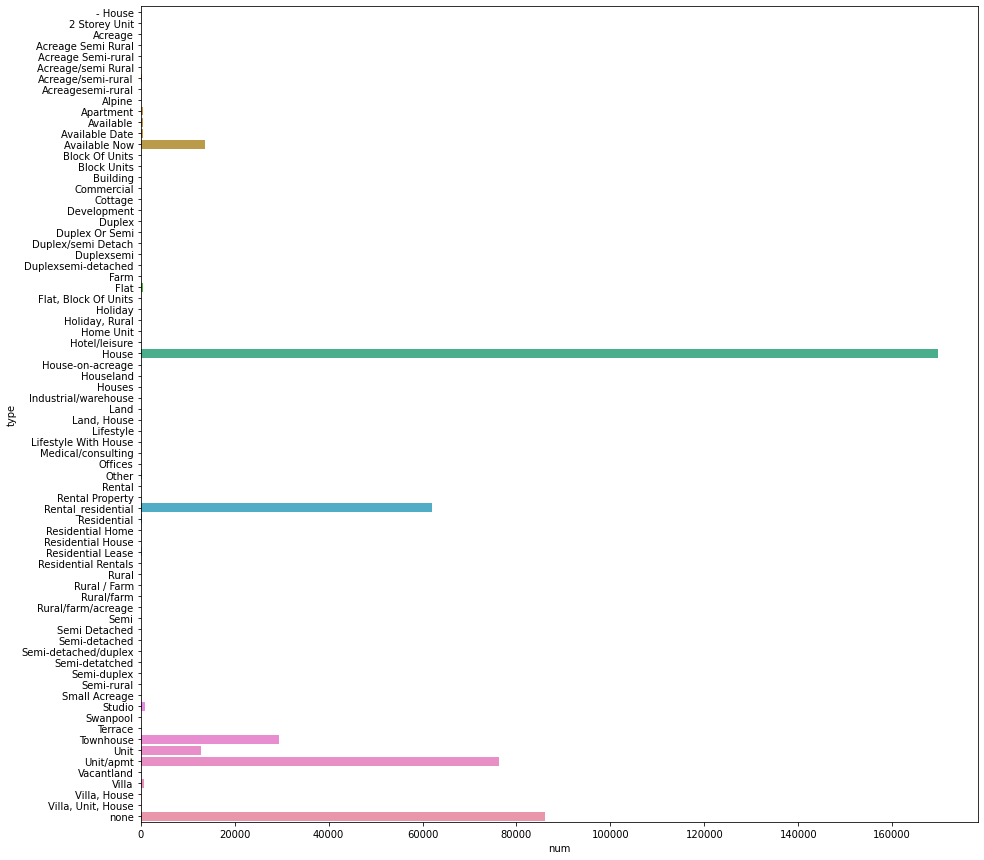

In [18]:
plt.figure(figsize=(15,15))
ax = sns.barplot(
    data=type_df, x="num", y="type",
)
# type 

In [20]:
type_df = type_df[type_df.type != 'Holiday, Rural']

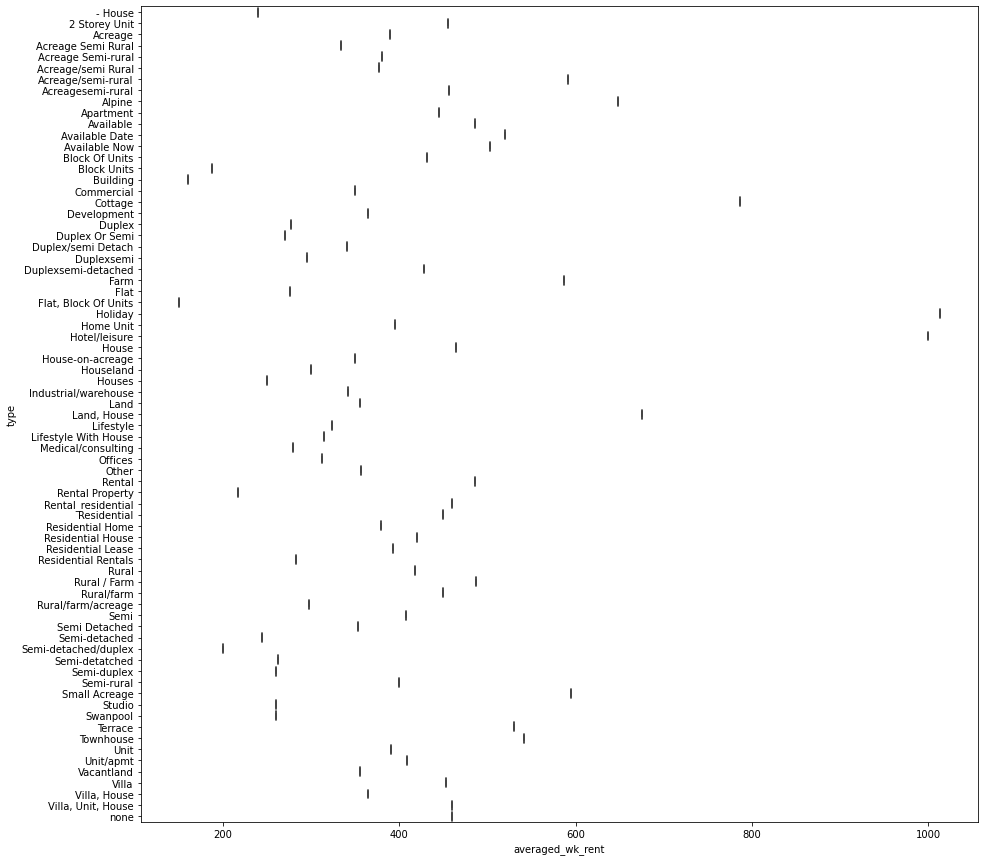

In [22]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(
    data=type_df, x="averaged_wk_rent", y="type",
)

In [162]:
type_df

,type,averaged_wk_rent,num
0,- House,240.000000,1
1,2 Storey Unit,455.000000,1
2,Acreage,389.016393,61
3,Acreage Semi Rural,333.888889,9
4,Acreage Semi-rural,380.769231,13
...,...,...,...
69,Vacantland,355.000000,4
70,Villa,452.733884,605
71,"Villa, House",365.000000,1
72,"Villa, Unit, House",460.000000,1


In [35]:
year_df = df[['type', 'year','weekly_rent','postcode']]\
        .groupby(['year'],as_index = False) \
        .agg(
            {\
                #'weekly_rent': 'mean', # count number of instances from sample
                'postcode': 'count'
            }
        ) \
        .rename({'postcode': 'num','weekly_rent': 'averaged_wk_rent' }, axis=1)

print(year_df)
print(f'in total: {sum(year_df.num)} instances')

    year     num
0   2006     679
1   2007    7568
2   2008    8332
3   2009    7005
4   2010    8960
5   2011   13064
6   2012   17090
7   2013   19027
8   2014   20694
9   2015   20773
10  2016   24246
11  2017   27940
12  2018   34438
13  2019   37896
14  2020   37497
15  2021   46696
16  2022  123240
in total: 455145 instances


Text(0.5, 1.0, 'Number of Property Rental Records from 2006 to 2022')

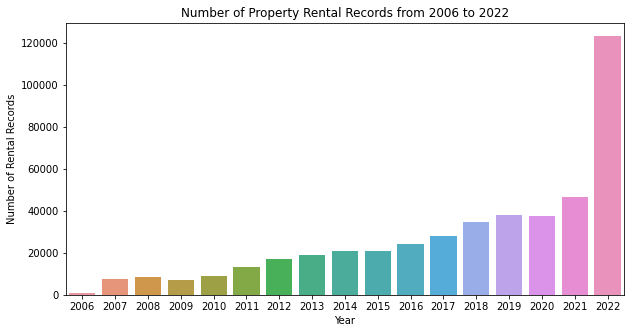

In [34]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=year_df, x="year", y="num",
)
plt.xlabel('Year')
plt.ylabel('Number of Rental Records')
plt.title("Number of Property Rental Records from 2006 to 2022")


In [53]:
data= list(year_df.num)
labels = list(year_df.year)
colors = sns.color_palette('pastel')[0:10]

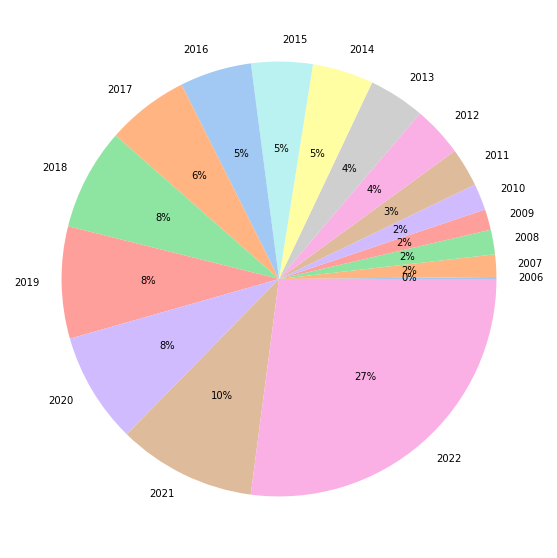

In [54]:
plt.figure(figsize=(10,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [145]:
curated_path = "../data/curated/property_all_with_SA2/*.csv"
file_lst2 = []
for fname in glob.glob(curated_path):
    file_lst2.append(fname)
file_lst2
# combine all files in the list
df_sa2 = pd.concat([pd.read_csv(f) for f in file_lst2 ])

In [146]:
df_2015 = df_sa2[df_sa2.year == 2015]
df_2014 = df_sa2[df_sa2.year == 2014]
df_2014_agg = df_2014[['SA2_CODE', 'year','weekly_rent','postcode']]\
        .groupby(['SA2_CODE'],as_index = False) \
        .agg(
            {\
                'weekly_rent': 'mean', # count number of instances from sample
                'postcode': 'count'
            }
        ) \
        .rename({'postcode': 'num_14','weekly_rent': 'averaged_wk_rent_14' }, axis=1)
df_2015_agg = df_2015[['SA2_CODE', 'year','weekly_rent','postcode']]\
        .groupby(['SA2_CODE'],as_index = False) \
        .agg(
            {\
                'weekly_rent': 'mean', # count number of instances from sample
                'postcode': 'count'
            }
        ) \
        .rename({'postcode': 'num_15','weekly_rent': 'averaged_wk_rent_15' }, axis=1)

In [147]:
df_join_14_15 = df_2014_agg.merge(df_2015_agg, how = 'inner', on = "SA2_CODE").dropna()
df_join_14_15 

,SA2_CODE,averaged_wk_rent_14,num_14,averaged_wk_rent_15,num_15
0,201011001,315.666667,15,348.120000,50
1,201011002,357.140187,107,368.495798,119
2,201011005,336.162791,43,373.359375,64
3,201011007,402.105263,19,392.500000,2
4,201011008,275.555556,18,309.809524,21
...,...,...,...,...,...
447,217031476,364.488095,84,366.533333,45
448,217041477,339.375000,16,365.400000,15
449,217041478,353.947368,76,347.196078,51
450,217041479,297.777778,9,298.000000,10


In [148]:
df_join_14_15['change_percent'] = (df_join_14_15.averaged_wk_rent_15 - df_join_14_15.averaged_wk_rent_14)/df_join_14_15.averaged_wk_rent_14 * 100

In [149]:
df_join_14_15

,SA2_CODE,averaged_wk_rent_14,num_14,averaged_wk_rent_15,num_15,change_percent
0,201011001,315.666667,15,348.120000,50,10.280887
1,201011002,357.140187,107,368.495798,119,3.179595
2,201011005,336.162791,43,373.359375,64,11.065051
3,201011007,402.105263,19,392.500000,2,-2.388743
4,201011008,275.555556,18,309.809524,21,12.430876
...,...,...,...,...,...,...
447,217031476,364.488095,84,366.533333,45,0.561126
448,217041477,339.375000,16,365.400000,15,7.668508
449,217041478,353.947368,76,347.196078,51,-1.907428
450,217041479,297.777778,9,298.000000,10,0.074627


In [153]:
df_join_14_15 = df_join_14_15.sort_values(by='change_percent', ascending=False)
df_join_14_15.head(10)

,SA2_CODE,averaged_wk_rent_14,num_14,averaged_wk_rent_15,num_15,change_percent
386,213051579,261.666667,3,656.666667,3,150.955414
16,201031016,265.000000,1,640.000000,3,141.509434
31,202021031,358.200000,5,722.000000,5,101.563372
274,211021262,458.000000,5,756.000000,8,65.065502
410,215011387,249.375000,8,409.315789,19,64.136657
321,212031557,380.000000,1,623.428571,7,64.060150
330,212041564,243.333333,3,392.083333,12,61.130137
185,208021427,347.500000,2,558.750000,4,60.791367
249,210041240,359.285714,7,574.666667,9,59.946985
425,216011406,316.096154,52,494.886364,44,56.561969


In [133]:
import geopandas as gpd
sf = gpd.read_file("../data/raw/Geo/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")


In [134]:
sf.columns
sf = sf.loc[sf["STE_CODE21"] == '2']
sf["SA2_CODE21"] = sf["SA2_CODE21"].astype(int)

In [138]:
sf.columns


Index(['SA2_CODE21', 'SA2_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21',
       'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21', 'GCC_CODE21', 'GCC_NAME21',
       'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21',
       'LOCI_URI21', 'geometry'],
      dtype='object')

In [156]:
change_1415 = df_join_14_15.merge(sf[['SA2_NAME21', 'SA2_CODE21']], how = 'left', left_on = 'SA2_CODE', right_on ='SA2_CODE21')
change_1415.drop("SA2_CODE21", axis=1, inplace=True)
change_1415


,SA2_CODE,averaged_wk_rent_14,num_14,averaged_wk_rent_15,num_15,change_percent,SA2_NAME21
0,213051579,261.666667,3,656.666667,3,150.955414,Manor Lakes - Quandong
1,201031016,265.000000,1,640.000000,3,141.509434,Maryborough (Vic.)
2,202021031,358.200000,5,722.000000,5,101.563372,Woodend
3,211021262,458.000000,5,756.000000,8,65.065502,Warrandyte - Wonga Park
4,215011387,249.375000,8,409.315789,19,64.136657,Ararat Surrounds
...,...,...,...,...,...,...,...
447,211021261,675.000000,3,430.000000,1,-36.296296,Donvale - Park Orchards
448,215011388,478.333333,9,279.000000,5,-41.672474,Horsham
449,205041096,424.906250,64,237.458333,24,-44.115123,Morwell
450,215011391,378.214286,14,208.333333,3,-44.916588,St Arnaud


changes in rent yearly sa2